In [1]:
import numpy as np
import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
import os
import shutil


from utils import make_folder, sine_wave, read_frames_from_folder, slope_detect_positive, cross_correlation, sine_slopes_together

In [2]:
folder_name = 'sine_waves'
isdir = os.path.isdir(folder_name)

if isdir is False:
    make_folder(folder_name)
else:
    print('Such directory already exists')

Such directory already exists


In [31]:
pixNoX = 100
pixNoY = 100
frNum = 5
steps = np.linspace(0.1, 0.7, 4)
f = 1
save_folder_name = folder_name

folders = sine_wave(pixNoX, pixNoY, frNum, steps, f, save_folder_name, delete_folders=True, noise=False)
print(folders)

['sine_waves/sine_waves_0.1', 'sine_waves/sine_waves_0.3', 'sine_waves/sine_waves_0.5', 'sine_waves/sine_waves_0.7']


In [32]:
kernel = 1
T = 20

slopes = np.zeros([pixNoY, pixNoX//2])
all_slopes = np.zeros([len(steps), pixNoY, pixNoX//2])
all_slopes.shape



(4, 100, 50)

In [33]:
path_to_images = 'sine_waves/sine_waves_0.7/'
image_1 = cv.imread(path_to_images + '0.jpg', cv.IMREAD_GRAYSCALE)
slopes = np.zeros([image_1.shape[0], image_1.shape[1]])  # empty matrix of 100x100


for folder, k in zip(folders, range(0, len(steps)+1)):
    path_to_images = f'{folder}/'
    for i in range(image_1.shape[0]):
        for j in range(image_1.shape[1]):
            pixel=[i, j]
            try:
                slope = slope_detect_positive(T, frNum, path_to_images, pixel, kernel)
            except ValueError:
                slope = None
            slopes[i, j] = slope
    all_slopes[k] = slopes

In [35]:
print(all_slopes[3])

[[-11. -11. -11. ... -11. -11. -11.]
 [-11. -11. -11. ... -11. -11. -11.]
 [-11. -11. -11. ... -11. -11. -11.]
 ...
 [-11. -11. -11. ... -11. -11. -11.]
 [-11. -11. -11. ... -11. -11. -11.]
 [-11. -11. -11. ... -11. -11. -11.]]


The slopes and angles for propagating sine waves are:
Step 0: -1.55 

Step 1: -4.75 

Step 2: -7.7 

Step 3: -11.0 



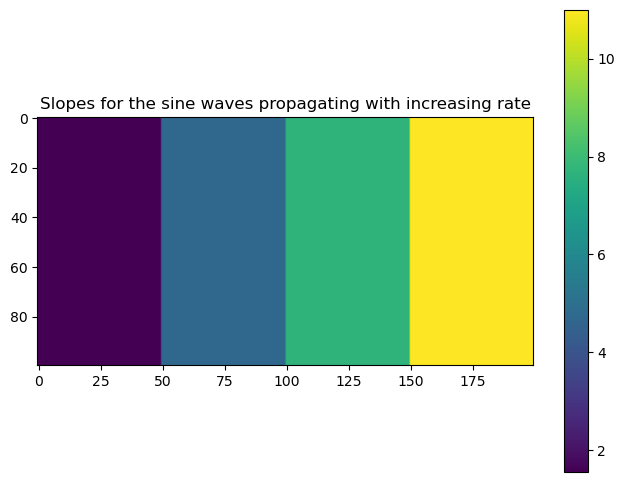

In [36]:
print('The slopes and angles for propagating sine waves are:')
for i in range(0, len(steps)):
    print(f'Step {i}:', round(all_slopes[i, 0, 0], 2), '\n')

#printing the result

all_slopes_1 = all_slopes[0]
for i in range(1, len(steps)):
    all_slopes_big = np.concatenate((all_slopes_1, all_slopes[i]), axis=1)
    all_slopes_1 = all_slopes_big

fig = plt.figure(figsize=(8, 6))
plt.imshow(abs(all_slopes_big))
plt.title('Slopes for the sine waves propagating with increasing rate')
plt.colorbar()
plt.show()